# Transfer Learning through Feature Extraction Method
## On Cats and Dogs Image Classification Dataset

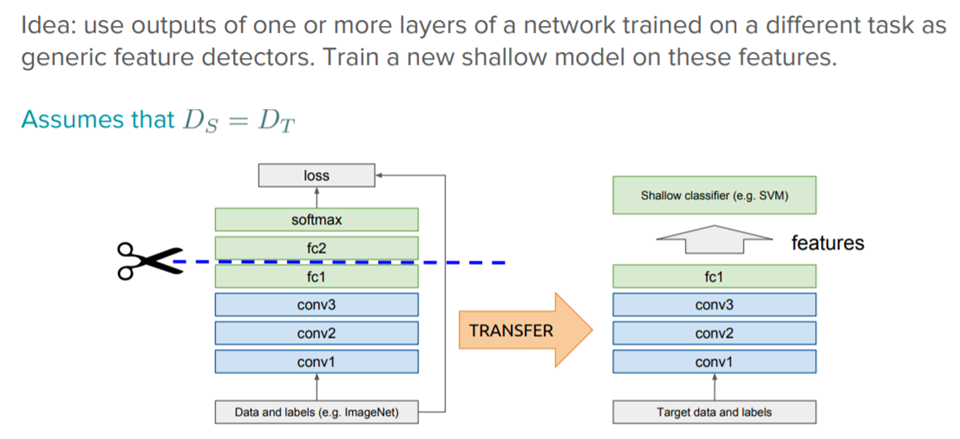

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [4]:
import glob
import os
import matplotlib.pyplot as plt

In [5]:
import zipfile

zip_files_input = ['test1', 'train']

for z in zip_files_input:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(z), 'r') as i:
        i.extractall(".")
        print("{} unzipped".format(z))

test1 unzipped
train unzipped


In [6]:
IMAGE_FOLDER_PATH = "../working/train"
FILE_NAMES = os.listdir("../working/train")
WIDTH = 150
HEIGHT = 150

targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

df=pd.DataFrame()
df['image_path']=full_paths
df['label']=targets
df.head(10)

,image_path,label
0,../working/train/dog.7811.jpg,dog
1,../working/train/cat.666.jpg,cat
2,../working/train/cat.7452.jpg,cat
3,../working/train/dog.10705.jpg,dog
4,../working/train/dog.10539.jpg,dog
5,../working/train/cat.9450.jpg,cat
6,../working/train/cat.5489.jpg,cat
7,../working/train/cat.7820.jpg,cat
8,../working/train/dog.11084.jpg,dog
9,../working/train/cat.4121.jpg,cat


In [7]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras import applications

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Method:
<br>
1. First we will extract features with the help of VGG16 from our entire target training dataset of cats and dogs.<br>
2. Then, reshape the features so that they can be input in a Shallow Classifier like Logistics Regression <br>
3. Do the train-test split <br>
4. Feed the features into the shallo classifier and get the predictions <br><br>

## VGG-16 model
<br>
The VGG16 model is trained on ImageNet dataset. The VGG16 model and all other image classification pre-trained models are found in Keras library
<br>
The ImageNet dataset consists of three parts, training data, validation data, and image labels. The training data contains 1000 categories and 1.2 million images, packaged for easy downloading. The validation and test data are not contained in the ImageNet training data (duplicates have been removed)
<br>
<br>

In [10]:
from keras import applications

# model trained on ImageNet dataset
model_vgg = applications.VGG16(weights="imagenet", include_top=False, input_shape=(WIDTH, HEIGHT, 3))
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Last set of output features have size: 4, 4, 512

In [13]:
# Extracting features using the VGG16 model created above and using our own training images of Cats and Dogs
counter=0
features=[]

for path, target in zip(full_paths, targets):
    img = load_img(path, target_size=(WIDTH, HEIGHT))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0) # expand dims increases the size of array, e.g. if axis=0 then ([1,2]) will become ([[1,2]])
    feature = model_vgg.predict(img)
    features.append(feature)
    counter += 1
    if counter%2500==0:
        print("{} images loaded".format(counter))

2500 images loaded
5000 images loaded
7500 images loaded
10000 images loaded
12500 images loaded
15000 images loaded
17500 images loaded
20000 images loaded
22500 images loaded
25000 images loaded


In [14]:
# Reshaping the features

features = np.array(features)
print("Features shape before reshaping: ", features.shape)

features = features.reshape(features.shape[0], 4*4*512)
print("Features shape after reshaping: ", features.shape)

Features shape before reshaping:  (25000, 1, 4, 4, 512)
Features shape after reshaping:  (25000, 8192)


In [15]:
le = LabelEncoder()
targets = le.fit_transform(targets)

print("Features shape: ", features.shape)
print("Targets shape: ", targets.shape)

Features shape:  (25000, 8192)
Targets shape:  (25000,)


In [16]:
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(features, targets, test_size=0.2, random_state=42)

Logistics regression params: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 



In [22]:
## Finally, building the shallow classification model and predicting the above features

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='lbfgs')
print("Training the shallow classification model: ", model_lr.__class__.__name__)

model_lr.fit(X_train_features, y_train_features)
y_pred = model_lr.predict(X_test_features)
y_pred[:10]

Training the shallow classification model:  LogisticRegression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

## Evaluation

In [27]:
print("Accuracy: ", metrics.accuracy_score(y_test_features, y_pred))
print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test_features, y_pred))
print("\nClassification Report: \n", metrics.classification_report(y_test_features, y_pred, target_names=['cat', 'dog']))

Accuracy:  0.9496

Confusion Matrix: 
 [[2378  117]
 [ 135 2370]]

Classification Report: 
               precision    recall  f1-score   support

         cat       0.95      0.95      0.95      2495
         dog       0.95      0.95      0.95      2505

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LogisticRegression(solver='lbfgs'), features, targets, cv=3)

print("Cross Validation Scores for Feature Extractor VGG model are: ", cv_scores)
print("Mean CV score: ", cv_scores.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross Validation Scores for Feature Extractor VGG model are:  [0.94672426 0.94683787 0.94515781]
Mean CV score:  0.9462399806287428


### Clearly, Transfer learning using VGG16 outperforms simple CNN with 94% classification accuracy on Validation set

## References: 

<br>
1. Challenge/Dataset: https://www.kaggle.com/c/dogs-vs-cats/data 
<br>
2. Notebook referred: https://www.kaggle.com/serkanpeldek/keras-cnn-transfer-learnings-on-cats-dogs-dataset
<br>
3. Theory article: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a